In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from datetime import datetime, timedelta
import warnings
from scipy import stats
import math 
import random
from numpy.random import seed
from numpy.random import normal
from scipy.stats import norm
import scipy
warnings.filterwarnings("ignore")

Part 1:
>
• Define variables for the model parameters. These variables will be used in subsequent parts of the work. Use the ̅
following values (which are those used in the Excel file given in the example) : 𝐴0 = 100, 𝛼 = 0.1, 𝜎 = 0.2, 𝐵 = 75, 𝑇 = 1, 𝜌 = 0.1 et 𝑛 = 100.

In [2]:
#Define variables for the model parameters
A0 = 100
alpha = 0.1
sigma_a = 0.2
bbar = 75
T = 1
rho = 0.1
n = 100

Part 2: 
>

• Calculate the distance to default (𝑑𝑑) and the probability of default (𝑃𝐷).



• Display these values on the screen.

In [3]:
#Equation for distance to defualt and probability of defualt
def equations(A0,bbar,alpha,sigma_a,T):
    dd = (np.log(A0/bbar) + (alpha - 0.5*sigma_a**2)*T)/(sigma_a*np.sqrt(T)) #Distance to default
    pd = scipy.special.ndtr(-dd) #Probability of default
    
    print('Distance to default:%10.3f' % round(dd,2), 'Probability of default:%10.4f' % round(pd,3)) #print rounded values

#Calculate distance to defualt and probability of defualt for the given parameters
equations(100,75,0.1,0.2,1)


Distance to default:     1.840 Probability of default:    0.0330


Part 3:
>
• Simulate a vector of 10 000 paths of 𝐿:
>
o Use the simulation procedure described in your slides and illustrated in the Excel example file. Use 𝑛 = 100 instead of 𝑛 = 5. 
>
o Store the simulated values of 𝐿 in a vector of dimension 10 000 × 1.
>
• Calculate the average of the simulated values and display this value on the screen. This average should be close to the default probability (𝑃𝐷).
>
• Generate a histogram of the simulated values. Be sure to provide a graph title and identify the axes (as in the Excel example file).

In [4]:
#Simulate values of F with a Normal (0; 1) and convert it to DataFrame
F = np.random.normal(size = 10000, loc = 0, scale = 1)

In [5]:
#Simulate n values of zi with Normal(0;1) for i = 1 to 100
mylist = []

for i in range(0,100):
    x = np.random.normal(size = 10000, loc = 0, scale = 1)
    mylist.append(x)

#convert it to a DataFrame and Transpose it
zibar=pd.DataFrame(mylist).T 





In [6]:
#Calculate the values of zi
zi0 = zibar.copy()
zi = zi0.copy()

for i in range(0,100):
    zi[i] = np.sqrt(rho)*F+np.sqrt(1-rho)*zi0[i]
    zi.append(zi[i])
    

In [7]:
#Calculate the n values of Ai
Ai = zi.copy()
for i in range(0,100):
    Ai[i] = A0*np.exp((alpha-0.5*sigma_a**2)*T +sigma_a*np.sqrt(T)*zi[i])
    Ai.append(Ai[i])

#Generate Li using dummies
Li = Ai.copy()
for i in range(0,100):
    Li[i] = (bbar >= Ai[i]).astype(int)
    Li.append(Li[i])
    
#Calculate n values of Li and add it to the DataFrame
Li['L'] = Li.mean(axis=1)

#Calculate Average of Ls which is close to PD (Compute the proportion of default)
Li['L'].mean()


0.033353

Text(0, 0.5, 'Count')

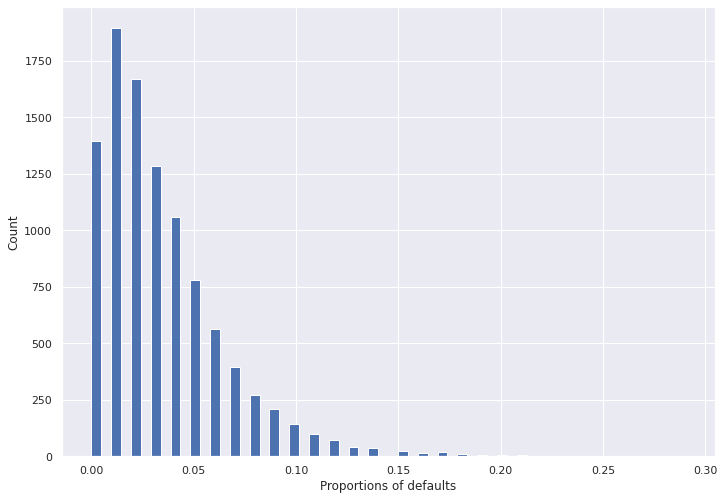

In [8]:
#histogram of simulated values
sns.set(rc={'figure.figsize':(11.7,8.27)})
Li['L'].hist(bins=int(60))
plt.xlabel("Proportions of defaults")
plt.ylabel("Count")

Part 4:
>
• Code a Python function that computes the density function of the proportion loss proportions (equation (1) in the slides).

• Using this function, reproduce the density graph that appears in the Excel example file that accompanies the slides (the case 𝜌 = 0.1). Be sure to provide a title for the graph and identify the axes.

In [9]:
#density function of the proportion loss proportions
def density_fun(x,PD,rho):
    den = np.sqrt((1-rho)/rho)*np.exp((-1)/(2*rho)*(np.sqrt(1-rho)*norm.ppf(x)-norm.ppf(PD))**2+0.5*(norm.ppf(x))**2) #equation 1
    return den

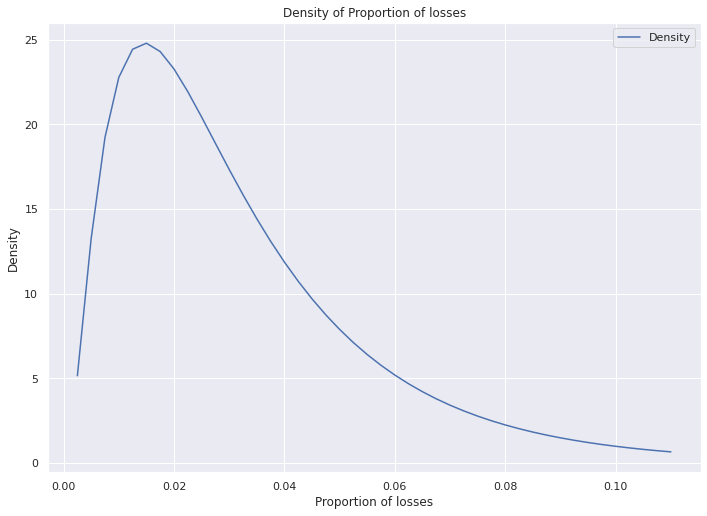

In [10]:
#reproducing path of x as same as what is done in Excel
x0 = [0] * 44
x0new = pd.DataFrame(x0,columns = ['X'])
x = x0new.copy()
for i in range(44):
    x.iloc[i] = x.iloc[i-1] + 0.0025
    x.append(x.iloc[i])
x_n = x.rename(columns={"X": "Proportion of losses"})

#applying density function to reproduced Xs
dens = x.copy()
for i in range(44):
    dens.iloc[i] = density_fun(x.iloc[i],0.033,0.1)
    dens.append(dens.iloc[i])
dens_n = dens.rename(columns={"X": "Density"})

denplot = pd.concat([x_n, dens_n], axis=1) #mergeing X and Density values of them to plot it
denplot.plot(x='Proportion of losses', y='Density', ylabel='Density', title='Density of Proportion of losses', figsize=(11.7,8.27))	


Part 5:
>
• Code a Python function that computes the distribution function of the proportions of losses (equation (2) in the slides):
>
• With this function, calculate 𝑃(𝐿 < 0.0823). Display this value on the screen.
>
• Using the 10 000 simulated paths of 𝐿, estimate this probability ( 𝑃(𝐿 < 0.0823) ) as in the Excel example. Display the estimated value on the screen.


In [11]:
#function that computes the distribution function of the proportions of losses 
def dist_fun(x,PD,rho):
  #equation (2) in the slides
  dist = scipy.special.ndtr((np.sqrt(1-rho)*scipy.special.ndtri(x)- scipy.special.ndtri(PD))/np.sqrt(rho))
  return dist


#Probability that the loss prop is smaller than X using the 10 000 simulated paths of 𝐿
sim_li = pd.DataFrame(Li['L'])
for i in range(0,10000):
    sim_li.iloc[i] = (0.0823 >= sim_li.iloc[i]).astype(int)
    sim_li.append(sim_li.iloc[i])

#calculate and print Prob. That the loss be smaller than X (using analytical calculation and simulation) for given parameters in Excel 

print('Prob. That the loss be smaller than X using analytical calculation is:%10.4f' % round(dist_fun(.0823,0.033,0.1),4),'\n',
      'Prob. That the loss be smaller than X using simulation is:%10.4f' % sim_li['L'].mean()) #for simulation we get the mean

Prob. That the loss be smaller than X using analytical calculation is:    0.9499 
 Prob. That the loss be smaller than X using simulation is:    0.9310


Part 6:
>
• Code a Python function that calculates the value at risk (equation (3) of the slides).
>
• With this function, calculate the value at risk for a probability of 5%. Display this value on the screen.
>
• Using the 10 000 simulated paths of 𝐿, estimate the value at risk by calculating a percentile of these paths. Display the value on the screen.


In [12]:
#calculates the value at risk (equation (3) of the slides)
from scipy.stats import norm
def VaR(A0,bbar,alpha,sigma_a,T,rho,p):
    dd = (np.log(A0/bbar) + (alpha - 0.5*sigma_a**2)*T)/(sigma_a*np.sqrt(T))
    PD = stats.norm.cdf(-dd)
    VaR = norm.cdf((np.sqrt(rho)*norm.ppf(1-p)+norm.ppf(PD))/np.sqrt(1-rho))
    return VaR

p = 0.05

#Calculating VaR using simulation
def VarSim(p):
    asc_order = np.sort(Li['L'])
    pnew = p*100
    return np.percentile(asc_order, 100-pnew)

p = 0.05
#print value at risk for a probability of 5% using analytical calculation and simulation
print('VaR using analytical calculation is:%10.4f' % round(VaR(A0,bbar,alpha,sigma_a,T,rho,p),5),'\n',
      'VaR using simulation is:%10.4f' % VarSim(p))

VaR using analytical calculation is:    0.0823 
 VaR using simulation is:    0.0900


Part 7:

• With the function calculating the value at risk, reproduce the graph from the Excel example that examines how the VaR changes as a function of 𝜌. Be sure to give the graph a title and identify the axes.

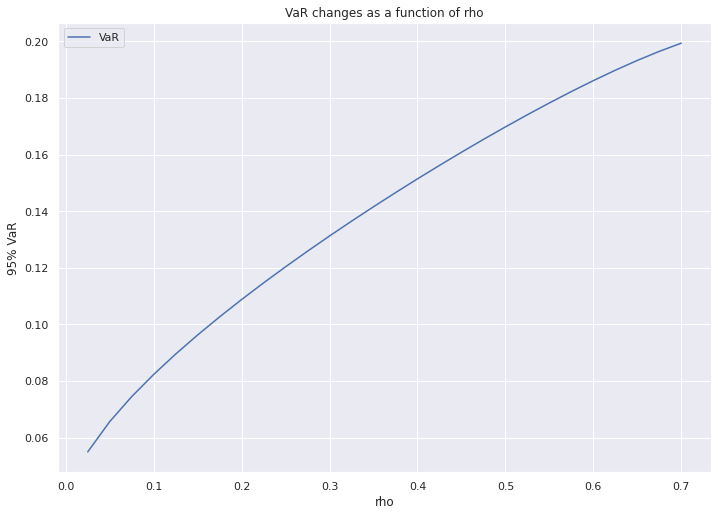

In [13]:
#reproducing different value for rho as given in Excel
rhos = pd.DataFrame(np.linspace(0.025, 0.7, num=28))
rhos_n = rhos.rename(columns={0: "rho"})

#calculate VaR for different rhos
rhoschanges = rhos.copy()
for i in range(28):
  rhoschanges.iloc[i] = VaR(100,75,0.1,0.2,1,rhos.iloc[i],0.05)
  rhoschanges.append(rhoschanges.iloc[i])
rhoschanges_n = rhoschanges.rename(columns={0: "VaR"})

#merge the dataframe of rhos with VaR dataframe to plot
rhosplot = pd.concat([rhos_n, rhoschanges_n], axis=1)	

#plot rhosplot dataframe
rhosplot.plot(kind = 'line', x = 'rho', y = 'VaR',ylabel='95% VaR', title='VaR changes as a function of rho', figsize=(11.7,8.27))